In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'torch'

In [4]:
# Check if CUDA is available (for GPU acceleration)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use "cuda" if available, otherwise fallback to "cpu"
print('Device:', device)

Device: cuda


In [5]:
transform = transforms.Compose([
    transforms.RandomRotation(10),  # Random rotation ±10 degrees
    transforms.RandomAffine(0, translate=(0.1, 0.1)),  # Random translation
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean/std
])         # Define any data transformations (e.g., ToTensor, Normalize, etc.)
train_dataset = datasets.MNIST(root = '/kaggle/working/', train = True, download=True, transform=transform)     # Load the training dataset with the defined transform
test_dataset = datasets.MNIST(root = '/kaggle/working/', train = False, download=True, transform=transform)      # Load the test dataset with the defined transform

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]


Extracting /kaggle/working/MNIST/raw/train-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 471kB/s]


Extracting /kaggle/working/MNIST/raw/train-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting /kaggle/working/MNIST/raw/t10k-images-idx3-ubyte.gz to /kaggle/working/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.90MB/s]

Extracting /kaggle/working/MNIST/raw/t10k-labels-idx1-ubyte.gz to /kaggle/working/MNIST/raw



torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
<class 'int'>
0 255
torch.Size([60000])
5


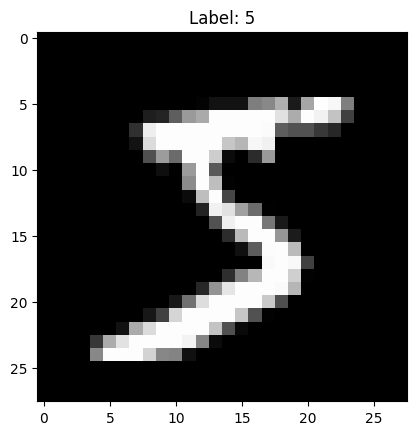

In [6]:
print(train_dataset.data.shape)                   # Print shape of training data
print(test_dataset.data.shape)                    # Print shape of test data
print(type(train_dataset.data[0,0,0].item()))     # Print data type of a pixel
print(train_dataset.data.min().item(), train_dataset.data.max().item())  # Print min and max pixel values
print(train_dataset.targets.shape)                # Print shape of labels
print(train_dataset.targets[0].item())            # Print the first label

# Display the first training image
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title(f'Label: {train_dataset.targets[0].item()}')
plt.show()

In [7]:
batch_size = 32
epochs = 10
learning_rate = 0.003

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # <-- This is the missing import
import torch.optim as optim
from torchvision import transforms

class EnhancedMNISTModel(nn.Module):
    def __init__(self):
        super(EnhancedMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)  # 1 input channel, 32 output channels
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(64*7*7, 128)  # 7x7 after 2 pooling layers
        self.fc2 = nn.Linear(128, 10)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

In [9]:
model = EnhancedMNISTModel()
model = model.to("cuda") # Instantiate the model and move it to the selected device
print(model)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # Define loss function (e.g., CrossEntropyLoss)
optimizer = optim.AdamW(model.parameters(), lr = learning_rate, weight_decay=0.0001)  # Define optimizer (e.g., Adam with model parameters and learning rate)
# Add learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max', patience=3)

EnhancedMNISTModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [10]:
# Section 5: Train the Network
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Create DataLoader for training data with batch_size and shuffle=True
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)   # Create DataLoader for test data with batch_size and shuffle=False


for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to("cuda"), labels.to("cuda")
        # Move images and labels to the device (CPU or GPU)
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass through the model
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        
        # Optimizer step
        optimizer.step()
        
        # Accumulate loss into running_loss
        running_loss += loss.item()

         # Print average loss for the epoch
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}')
    

Epoch 1/10, Loss: 0.9932
Epoch 2/10, Loss: 0.8328
Epoch 3/10, Loss: 0.8008
Epoch 4/10, Loss: 0.7824
Epoch 5/10, Loss: 0.7762
Epoch 6/10, Loss: 0.7696
Epoch 7/10, Loss: 0.7658
Epoch 8/10, Loss: 0.7598
Epoch 9/10, Loss: 0.7581
Epoch 10/10, Loss: 0.7573


In [11]:
model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for images, _ in test_loader:
        images = images.to("cuda") # Move images to the device
        # Perform a forward pass through the model
        outputs = model(images)
        
        # Get the predicted class labels (e.g., using torch.max)
        _, predicted = torch.max(outputs, 1)
        
        # Append predictions to the predictions list
        predictions.extend(predicted.cpu().numpy())
print(f"First 10 predictions: {predictions[:10]}")

First 10 predictions: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


Predicted digit: 4


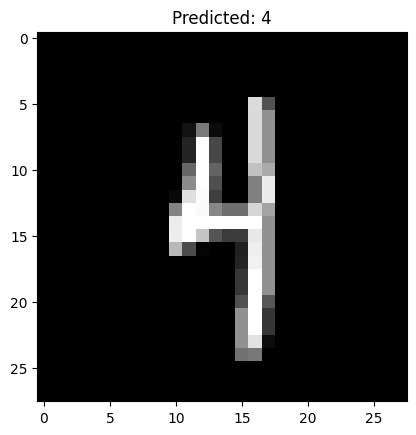

In [12]:
index = 65  # Choose an index to visualize

# Print the predicted digit at the chosen index
print(f'Predicted digit: {predictions[index]}')

# Display the corresponding image from the test dataset
plt.imshow(test_dataset.data[index], cmap='gray')
plt.title(f'Predicted: {predictions[index]}')
plt.show()

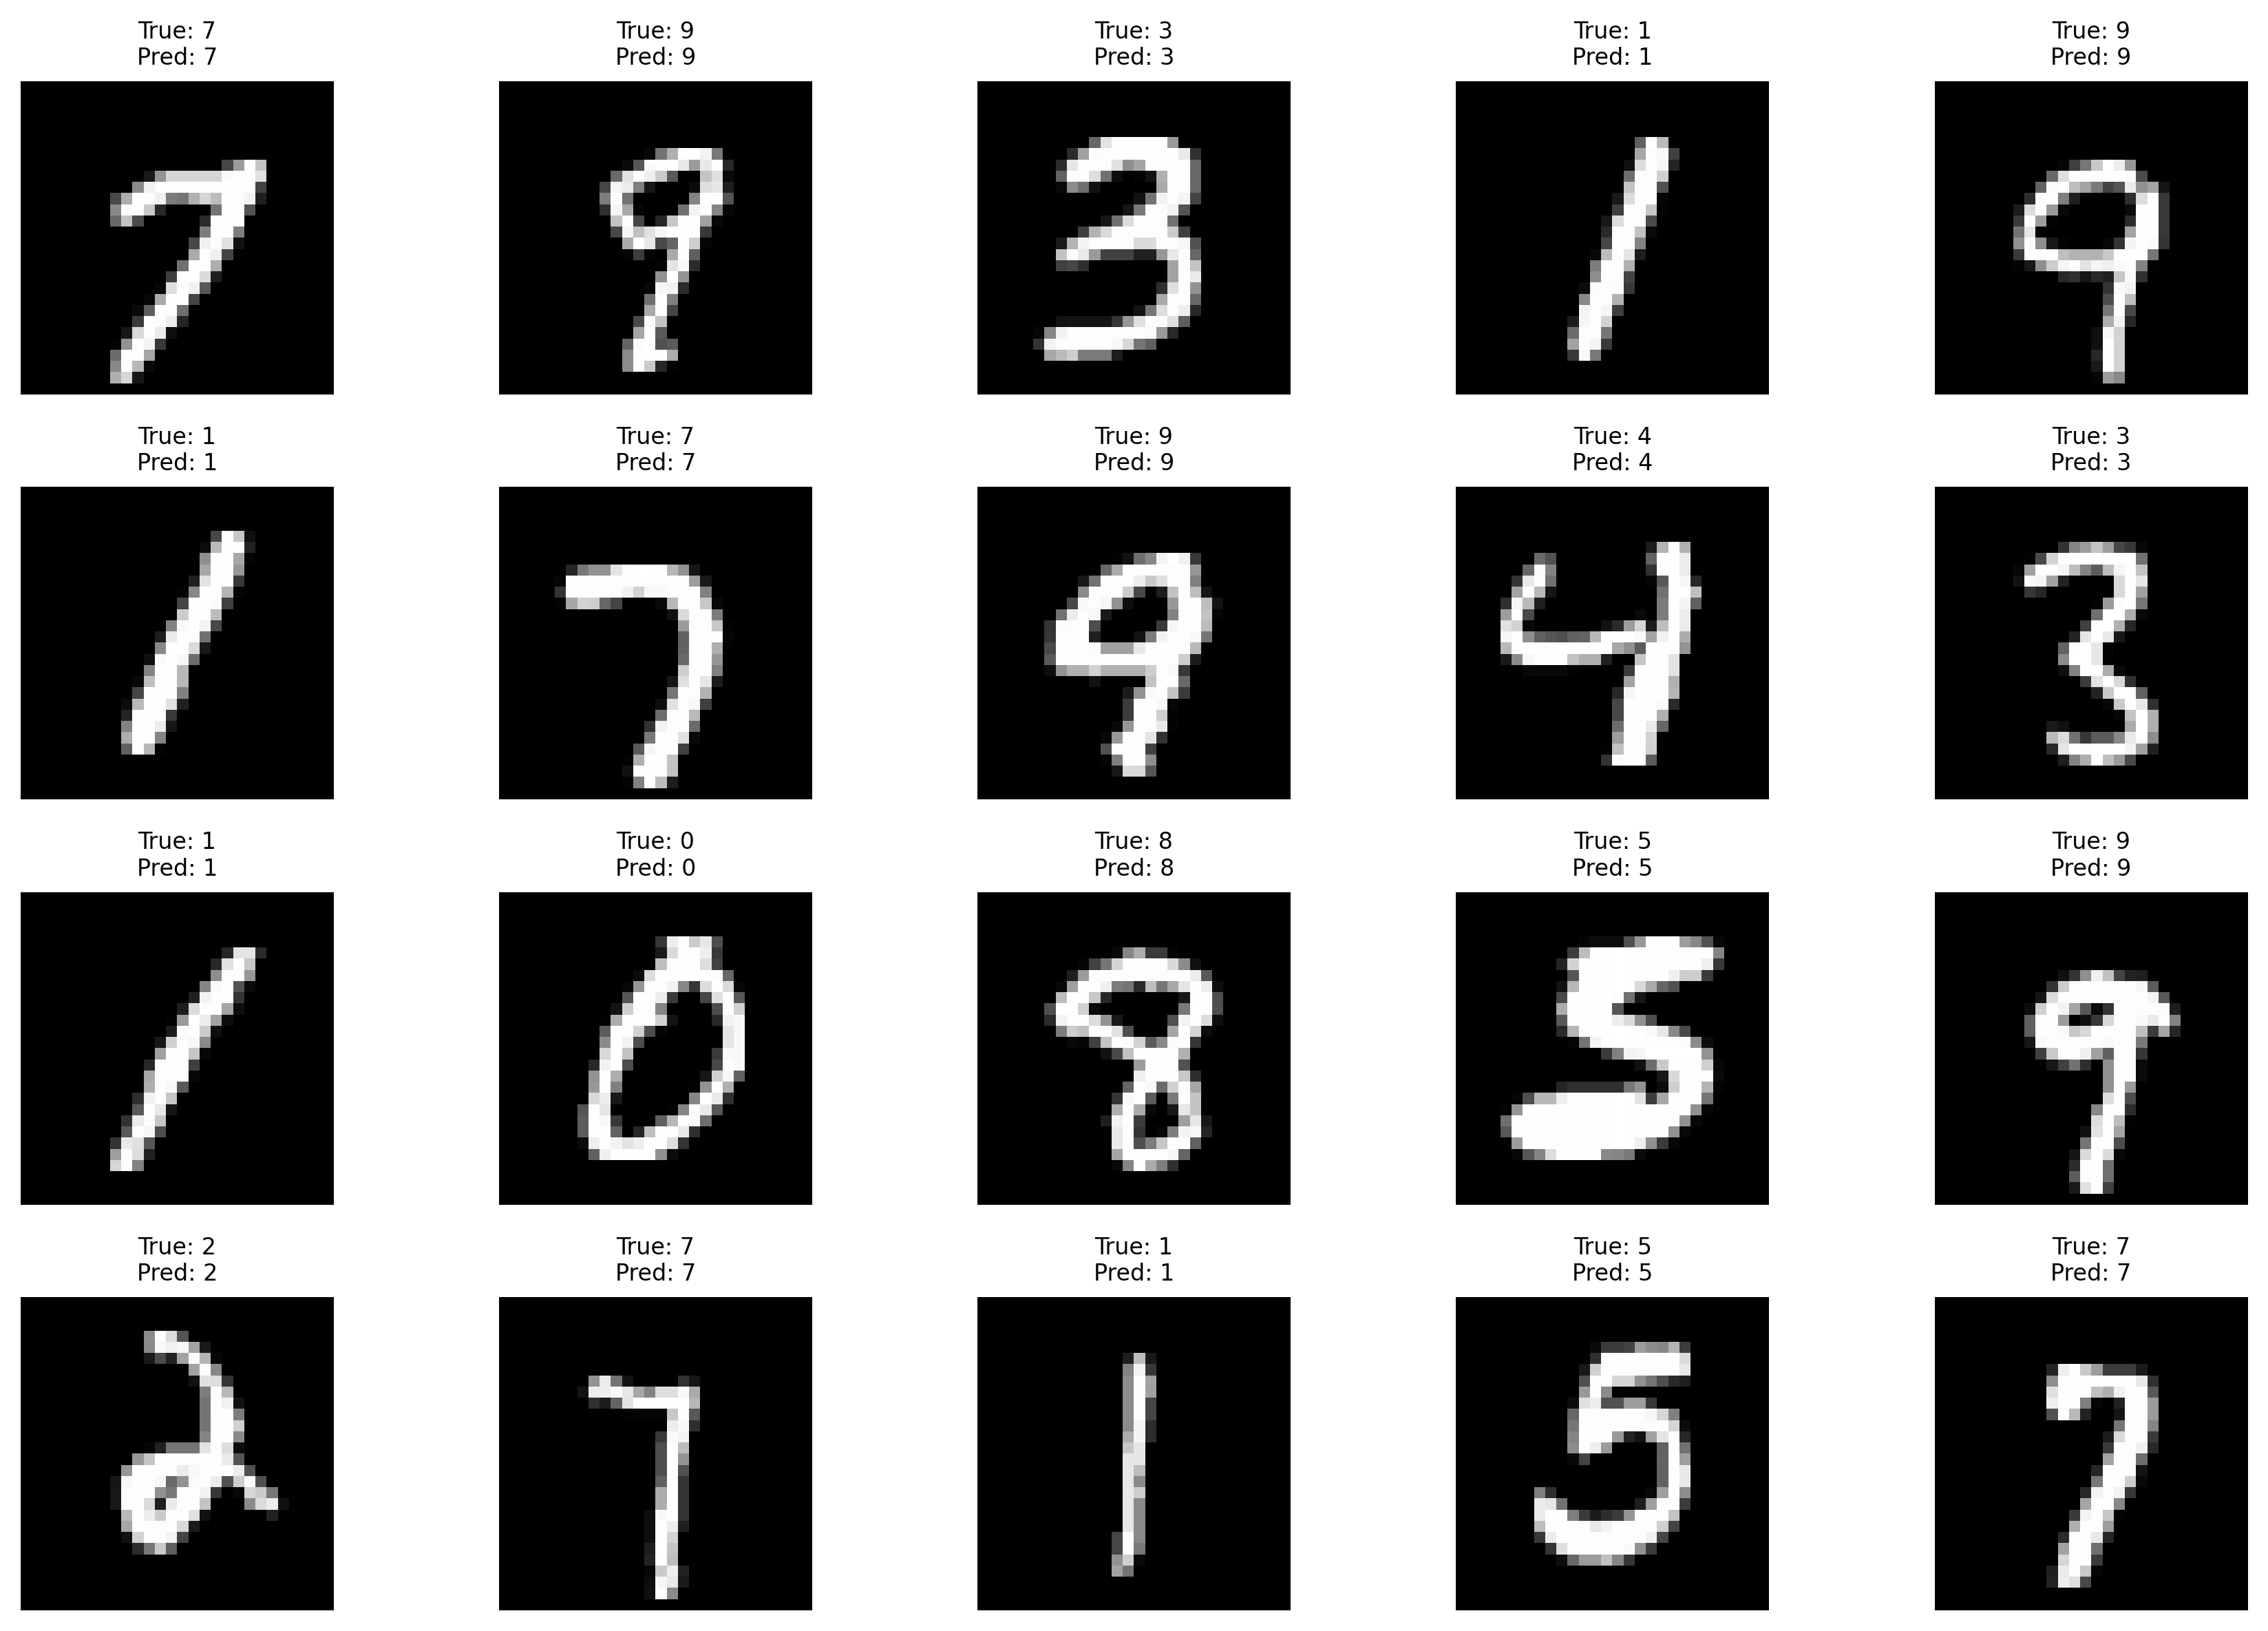

In [13]:
# Display the first image in the training dataset
import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure(figsize=(12, 8), dpi=300)

# Set the number of images to display
num_images = 20
rows = 4
cols = 5

# Get random indices
random_indices = random.sample(range(len(test_dataset)), num_images)

# Plot images in grid
for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i+1)
    plt.imshow(test_dataset.data[idx], cmap='gray')
    plt.title(f'True: {test_dataset.targets[idx]}\nPred: {predictions[idx]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Note: you may need to restart the kernel to use updated packages.


In [15]:

import pickle

pickle.dump(random_model, open('MNIST_Classification_CNN.plk', 'wb'))

NameError: name 'random_model' is not defined